# Importing The Libraries #

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Data Preprocessing 

In [2]:
dataset = '../Data/Processed/2024/data_2024.csv'

df = pd.read_csv(dataset)
df

date  steps  calories_burned  distance_km  sleep_hours  \
0       2024-01-01  21286          3015.37         1.79          9.8   
1       2024-01-01  12858          3881.17        10.75          3.4   
2       2024-01-01  16651          2318.77        14.23          6.3   
3       2024-01-01   5725          2672.27         2.89          2.0   
4       2024-01-01  22598          2585.65         3.15         10.6   
...            ...    ...              ...          ...          ...   
313607  2024-12-31  22381          2186.32        10.46          8.5   
313608  2024-12-31   8316          2805.43         0.09         10.2   
313609  2024-12-31  18582          3202.74        10.05          1.6   
313610  2024-12-31  17346          2248.72        18.93          3.5   
313611  2024-12-31  29599          2929.43        12.50          5.6   

        heart_rate_avg workout_type weather_conditions      mood  
0                   76      Walking              Clear  Stressed  
1                  137      Walking                Fog     Happy  
2                  107      Cycling                Fog   Neutral  
3                   66         Yoga              Clear   Neutral  
4                  156      Running               Rain   Neutral  
...                ...          ...                ...       ...  
313607             116  Gym Workout                Fog     Tired  
313608              65      Cycling               Rain   Neutral  
313609              92  Gym Workout               Rain     Happy  
313610             155         Yoga               Rain  Stressed  
313611             155         Yoga                Fog  Stressed  

[313612 rows x 9 columns]

***Splitting The Dataset Based On Workout Type***

In [3]:
# Get unique workout types
unique_workout_types = df['workout_type'].unique()

# Loop through each unique workout type and create a DataFrame
for workout_type in unique_workout_types:
    # Create a valid variable name (replace spaces with underscores)
    variable_name = f"{workout_type.replace(' ', '_')}_df"
    
    # Create the DataFrame using exec
    exec(f"{variable_name} = df[df['workout_type'] == '{workout_type}'].reset_index(drop=True)")
    
    # Print the DataFrame using exec
    exec(f"print('{variable_name}')")  # Print the variable name


Walking_df
Cycling_df
Yoga_df
Running_df
Gym_Workout_df
Swimming_df


***Grouping Into Month Wise***

**Walking**

In [4]:
Walking_df.describe()


steps  calories_burned   distance_km   sleep_hours  \
count  51959.000000     51959.000000  51959.000000  51959.000000   
mean   15025.870783      2753.467762     10.017191      5.992163   
std     8648.002552       722.300223      5.772965      3.471407   
min        0.000000      1500.110000      0.000000      0.000000   
25%     7530.000000      2127.820000      5.040000      3.000000   
50%    15072.000000      2753.700000     10.040000      6.000000   
75%    22464.500000      3384.265000     15.000000      9.000000   
max    29999.000000      3999.990000     20.000000     12.000000   

       heart_rate_avg  
count    51959.000000  
mean       119.146924  
std         34.684078  
min         60.000000  
25%         89.000000  
50%        119.000000  
75%        149.000000  
max        179.000000

In [5]:
Walking_df['date'] = pd.to_datetime(Walking_df['date'])
Walking_df['month_name'] = Walking_df['date'].dt.strftime('%B')
Walking_df = Walking_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Walking_df.columns if col != 'month_name']
Walking_df = Walking_df[columns_order]
Walking_df = Walking_df.rename(columns={'month_name' : 'month'})
Walking_df

month  steps  calories_burned  distance_km  sleep_hours  \
0       January  21286          3015.37         1.79          9.8   
1       January  12858          3881.17        10.75          3.4   
2       January  15546          1937.07         6.82          8.4   
3       January  17263          3963.16         2.05          6.7   
4       January  23562          2806.34        14.32          5.3   
...         ...    ...              ...          ...          ...   
51954  December  17329          2750.94         7.80          3.4   
51955  December  25071          2543.85         0.25          2.9   
51956  December   1455          3156.71        13.47          4.8   
51957  December  24819          2706.34        14.82         11.4   
51958  December  16068          1767.36         5.70          7.5   

       heart_rate_avg workout_type weather_conditions      mood  
0                  76      Walking              Clear  Stressed  
1                 137      Walking                Fog     Happy  
2                  98      Walking               Snow   Neutral  
3                 130      Walking               Rain   Neutral  
4                 107      Walking               Rain  Stressed  
...               ...          ...                ...       ...  
51954              77      Walking              Clear  Stressed  
51955             165      Walking               Rain  Stressed  
51956             119      Walking                Fog     Tired  
51957              62      Walking               Rain  Stressed  
51958              96      Walking               Snow     Happy  

[51959 rows x 9 columns]

In [6]:
grouped_walking_df = Walking_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_walking_df = grouped_walking_df.reset_index()
grouped_walking_df


month         steps  calories_burned  distance_km  sleep_hours  \
0       April  15022.769724      2748.985516    10.024007     6.019819   
1      August  15099.612100      2750.315870    10.005160     5.997353   
2    December  14952.899083      2772.125952     9.966682     5.963527   
3    February  15174.000724      2750.018618    10.132673     5.977660   
4     January  14911.874487      2749.991433     9.937084     6.019385   
5        July  14885.201563      2737.097274    10.035456     5.942565   
6        June  15064.481175      2759.907360     9.983817     5.944708   
7       March  15042.903590      2731.390027    10.075690     5.986724   
8         May  15041.513284      2762.797955     9.948548     6.080371   
9    November  15029.925289      2763.673646    10.021864     5.948904   
10    October  14955.687758      2766.594253    10.058070     6.026616   
11  September  15140.031564      2748.727393    10.023755     5.996212   

    heart_rate_avg weather_conditions      mood  
0       119.906606               Rain  Stressed  
1       119.062722               Snow     Tired  
2       118.891698               Rain  Stressed  
3       120.096019               Snow  Stressed  
4       118.760820               Snow   Neutral  
5       118.085727              Clear     Tired  
6       118.739995                Fog     Tired  
7       119.408670               Rain     Happy  
8       119.258818               Snow   Neutral  
9       119.712703                Fog     Happy  
10      118.920449               Snow   Neutral  
11      118.996960              Clear     Happy

In [7]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_walking_df['month'] = pd.Categorical(grouped_walking_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_walking_df = grouped_walking_df.sort_values(by='month')

# Reset index if needed
grouped_walking_df = grouped_walking_df.reset_index(drop=True)
grouped_walking_df

month         steps  calories_burned  distance_km  sleep_hours  \
0     January  14911.874487      2749.991433     9.937084     6.019385   
1    February  15174.000724      2750.018618    10.132673     5.977660   
2       March  15042.903590      2731.390027    10.075690     5.986724   
3       April  15022.769724      2748.985516    10.024007     6.019819   
4         May  15041.513284      2762.797955     9.948548     6.080371   
5        June  15064.481175      2759.907360     9.983817     5.944708   
6        July  14885.201563      2737.097274    10.035456     5.942565   
7      August  15099.612100      2750.315870    10.005160     5.997353   
8   September  15140.031564      2748.727393    10.023755     5.996212   
9     October  14955.687758      2766.594253    10.058070     6.026616   
10   November  15029.925289      2763.673646    10.021864     5.948904   
11   December  14952.899083      2772.125952     9.966682     5.963527   

    heart_rate_avg weather_conditions      mood  
0       118.760820               Snow   Neutral  
1       120.096019               Snow  Stressed  
2       119.408670               Rain     Happy  
3       119.906606               Rain  Stressed  
4       119.258818               Snow   Neutral  
5       118.739995                Fog     Tired  
6       118.085727              Clear     Tired  
7       119.062722               Snow     Tired  
8       118.996960              Clear     Happy  
9       118.920449               Snow   Neutral  
10      119.712703                Fog     Happy  
11      118.891698               Rain  Stressed

**Cycling** 

In [8]:
Cycling_df.describe()


steps  calories_burned   distance_km   sleep_hours  \
count  52306.000000     52306.000000  52306.000000  52306.000000   
mean   14969.327286      2748.705452      9.972975      5.979733   
std     8659.865654       722.867147      5.764497      3.470760   
min        0.000000      1500.020000      0.000000      0.000000   
25%     7462.000000      2119.922500      4.980000      3.000000   
50%    14951.000000      2748.190000      9.980000      6.000000   
75%    22483.000000      3376.302500     14.990000      9.000000   
max    29999.000000      3999.760000     20.000000     12.000000   

       heart_rate_avg  
count    52306.000000  
mean       119.334627  
std         34.705393  
min         60.000000  
25%         89.000000  
50%        119.000000  
75%        149.000000  
max        179.000000

In [9]:
Cycling_df['date'] = pd.to_datetime(Cycling_df['date'])
Cycling_df['month_name'] = Cycling_df['date'].dt.strftime('%B')
Cycling_df = Cycling_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Cycling_df.columns if col != 'month_name']
Cycling_df = Cycling_df[columns_order]
Cycling_df = Cycling_df.rename(columns={'month_name' : 'month'})
Cycling_df

month  steps  calories_burned  distance_km  sleep_hours  \
0       January  16651          2318.77        14.23          6.3   
1       January   3425          3553.52        19.69          4.1   
2       January  16330          3832.07        15.11          3.2   
3       January  10705          3044.41         5.08          5.2   
4       January  23178          2996.45         9.76          9.6   
...         ...    ...              ...          ...          ...   
52301  December   2418          3853.86         9.61          6.6   
52302  December  23692          1719.28         7.60          7.2   
52303  December   5611          1661.53         8.71          5.4   
52304  December   5822          2545.66         9.64          0.6   
52305  December   8316          2805.43         0.09         10.2   

       heart_rate_avg workout_type weather_conditions      mood  
0                 107      Cycling                Fog   Neutral  
1                 164      Cycling               Snow  Stressed  
2                  60      Cycling              Clear  Stressed  
3                 141      Cycling              Clear     Tired  
4                 116      Cycling                Fog  Stressed  
...               ...          ...                ...       ...  
52301             100      Cycling                Fog     Happy  
52302              73      Cycling                Fog     Happy  
52303             142      Cycling               Rain   Neutral  
52304             161      Cycling               Rain     Tired  
52305              65      Cycling               Rain   Neutral  

[52306 rows x 9 columns]

In [10]:
grouped_cycling_df = Cycling_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_cycling_df = grouped_cycling_df.reset_index()
grouped_cycling_df

month         steps  calories_burned  distance_km  sleep_hours  \
0       April  14871.651981      2756.801578     9.970366     5.947366   
1      August  14952.425440      2741.299210    10.043268     5.968737   
2    December  15142.644926      2747.493592    10.000189     6.006682   
3    February  14799.138469      2750.497855     9.824082     6.062371   
4     January  15040.955863      2744.786667     9.968783     5.959273   
5        July  14765.715037      2748.818275    10.055416     6.036220   
6        June  14869.484855      2763.661949     9.812668     5.923353   
7       March  15014.200224      2742.746512    10.013145     5.965859   
8         May  15106.325776      2752.141514    10.028649     6.007572   
9    November  14908.531441      2740.553688     9.864172     6.012224   
10    October  15046.482305      2749.373090     9.887668     5.939474   
11  September  15097.370014      2746.672941    10.195598     5.931797   

    heart_rate_avg weather_conditions      mood  
0       119.730303               Snow   Neutral  
1       119.078100                Fog     Tired  
2       118.948005               Rain     Happy  
3       119.168946              Clear     Happy  
4       120.144226               Snow  Stressed  
5       119.861974              Clear  Stressed  
6       119.773410               Rain   Neutral  
7       118.097194               Rain   Neutral  
8       118.997053              Clear  Stressed  
9       119.750587               Snow     Happy  
10      119.036978               Snow     Happy  
11      119.452774                Fog     Tired

In [11]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_cycling_df['month'] = pd.Categorical(grouped_cycling_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_cycling_df = grouped_cycling_df.sort_values(by='month')

# Reset index if needed
grouped_cycling_df = grouped_cycling_df.reset_index(drop=True)
grouped_cycling_df

month         steps  calories_burned  distance_km  sleep_hours  \
0     January  15040.955863      2744.786667     9.968783     5.959273   
1    February  14799.138469      2750.497855     9.824082     6.062371   
2       March  15014.200224      2742.746512    10.013145     5.965859   
3       April  14871.651981      2756.801578     9.970366     5.947366   
4         May  15106.325776      2752.141514    10.028649     6.007572   
5        June  14869.484855      2763.661949     9.812668     5.923353   
6        July  14765.715037      2748.818275    10.055416     6.036220   
7      August  14952.425440      2741.299210    10.043268     5.968737   
8   September  15097.370014      2746.672941    10.195598     5.931797   
9     October  15046.482305      2749.373090     9.887668     5.939474   
10   November  14908.531441      2740.553688     9.864172     6.012224   
11   December  15142.644926      2747.493592    10.000189     6.006682   

    heart_rate_avg weather_conditions      mood  
0       120.144226               Snow  Stressed  
1       119.168946              Clear     Happy  
2       118.097194               Rain   Neutral  
3       119.730303               Snow   Neutral  
4       118.997053              Clear  Stressed  
5       119.773410               Rain   Neutral  
6       119.861974              Clear  Stressed  
7       119.078100                Fog     Tired  
8       119.452774                Fog     Tired  
9       119.036978               Snow     Happy  
10      119.750587               Snow     Happy  
11      118.948005               Rain     Happy

**Yoga**

In [12]:
Yoga_df.describe()


steps  calories_burned   distance_km   sleep_hours  \
count  52315.000000     52315.000000  52315.000000  52315.000000   
mean   15031.155500      2748.377417     10.034772      5.999606   
std     8697.741848       720.374224      5.773816      3.465881   
min        0.000000      1500.040000      0.000000      0.000000   
25%     7403.000000      2124.365000      5.030000      3.000000   
50%    15147.000000      2747.610000     10.050000      6.000000   
75%    22584.500000      3372.535000     15.040000      9.000000   
max    29999.000000      3999.840000     20.000000     12.000000   

       heart_rate_avg  
count    52315.000000  
mean       119.469579  
std         34.595308  
min         60.000000  
25%         90.000000  
50%        120.000000  
75%        149.000000  
max        179.000000

In [13]:
Yoga_df['date'] = pd.to_datetime(Yoga_df['date'])
Yoga_df['month_name'] = Yoga_df['date'].dt.strftime('%B')
Yoga_df = Yoga_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Yoga_df.columns if col != 'month_name']
Yoga_df = Yoga_df[columns_order]
Yoga_df = Yoga_df.rename(columns={'month_name' : 'month'})
Yoga_df

month  steps  calories_burned  distance_km  sleep_hours  \
0       January   5725          2672.27         2.89          2.0   
1       January  22799          2295.54         5.21          7.4   
2       January   3518          3178.32        13.48          2.1   
3       January   6175          1978.81         0.41         11.9   
4       January  13896          2498.86        18.27          6.6   
...         ...    ...              ...          ...          ...   
52310  December  23544          2667.27        16.81          5.9   
52311  December  15719          2768.75        10.07          5.4   
52312  December  27483          1790.42         6.94          0.2   
52313  December  17346          2248.72        18.93          3.5   
52314  December  29599          2929.43        12.50          5.6   

       heart_rate_avg workout_type weather_conditions      mood  
0                  66         Yoga              Clear   Neutral  
1                 106         Yoga                Fog     Tired  
2                  76         Yoga              Clear     Happy  
3                  82         Yoga                Fog     Tired  
4                  70         Yoga               Snow   Neutral  
...               ...          ...                ...       ...  
52310             178         Yoga                Fog  Stressed  
52311              80         Yoga              Clear  Stressed  
52312             166         Yoga               Snow     Tired  
52313             155         Yoga               Rain  Stressed  
52314             155         Yoga                Fog  Stressed  

[52315 rows x 9 columns]

In [14]:
grouped_yoga_df = Yoga_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_yoga_df = grouped_yoga_df.reset_index()
grouped_yoga_df

month         steps  calories_burned  distance_km  sleep_hours  \
0       April  15095.091567      2766.362231    10.009960     5.954777   
1      August  15121.077773      2748.716675    10.070370     5.987173   
2    December  15197.070781      2752.790745    10.066375     6.000863   
3    February  14924.411322      2763.024312     9.940046     5.907775   
4     January  14862.027356      2764.545939    10.091480     6.048679   
5        July  14970.123626      2758.485348     9.994592     6.025549   
6        June  14866.524805      2752.679690    10.036601     6.019752   
7       March  15154.569189      2726.389004    10.086079     6.074832   
8         May  15131.256751      2742.054617     9.997106     5.958438   
9    November  15029.626313      2720.581464    10.154431     5.956007   
10    October  15049.657188      2743.392839    10.010596     6.066915   
11  September  14949.161442      2743.499411     9.950356     5.987367   

    heart_rate_avg weather_conditions      mood  
0       118.659425                Fog     Tired  
1       119.839270               Rain   Neutral  
2       118.731697               Snow   Neutral  
3       120.157677                Fog     Tired  
4       118.728548               Snow  Stressed  
5       119.766712               Rain   Neutral  
6       119.648140                Fog     Tired  
7       119.186073                Fog   Neutral  
8       119.556256               Snow     Happy  
9       119.559159                Fog   Neutral  
10      119.428120              Clear     Happy  
11      120.435541              Clear   Neutral

In [15]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_yoga_df['month'] = pd.Categorical(grouped_yoga_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_yoga_df = grouped_yoga_df.sort_values(by='month')

# Reset index if needed
grouped_yoga_df = grouped_yoga_df.reset_index(drop=True)
grouped_yoga_df

month         steps  calories_burned  distance_km  sleep_hours  \
0     January  14862.027356      2764.545939    10.091480     6.048679   
1    February  14924.411322      2763.024312     9.940046     5.907775   
2       March  15154.569189      2726.389004    10.086079     6.074832   
3       April  15095.091567      2766.362231    10.009960     5.954777   
4         May  15131.256751      2742.054617     9.997106     5.958438   
5        June  14866.524805      2752.679690    10.036601     6.019752   
6        July  14970.123626      2758.485348     9.994592     6.025549   
7      August  15121.077773      2748.716675    10.070370     5.987173   
8   September  14949.161442      2743.499411     9.950356     5.987367   
9     October  15049.657188      2743.392839    10.010596     6.066915   
10   November  15029.626313      2720.581464    10.154431     5.956007   
11   December  15197.070781      2752.790745    10.066375     6.000863   

    heart_rate_avg weather_conditions      mood  
0       118.728548               Snow  Stressed  
1       120.157677                Fog     Tired  
2       119.186073                Fog   Neutral  
3       118.659425                Fog     Tired  
4       119.556256               Snow     Happy  
5       119.648140                Fog     Tired  
6       119.766712               Rain   Neutral  
7       119.839270               Rain   Neutral  
8       120.435541              Clear   Neutral  
9       119.428120              Clear     Happy  
10      119.559159                Fog   Neutral  
11      118.731697               Snow   Neutral

**Swimming**

In [16]:
Swimming_df.describe()


steps  calories_burned   distance_km   sleep_hours  \
count  52457.000000     52457.000000  52457.000000  52457.000000   
mean   14988.118345      2750.215903      9.966644      6.013352   
std     8661.229199       720.738018      5.780092      3.453099   
min        0.000000      1500.060000      0.000000      0.000000   
25%     7474.000000      2128.260000      4.950000      3.000000   
50%    14969.000000      2742.710000      9.910000      6.000000   
75%    22457.000000      3376.890000     14.970000      9.000000   
max    29999.000000      3999.940000     20.000000     12.000000   

       heart_rate_avg  
count    52457.000000  
mean       119.360962  
std         34.684478  
min         60.000000  
25%         89.000000  
50%        119.000000  
75%        149.000000  
max        179.000000

In [17]:
Swimming_df['date'] = pd.to_datetime(Swimming_df['date'])
Swimming_df['month_name'] = Swimming_df['date'].dt.strftime('%B')
Swimming_df = Swimming_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Swimming_df.columns if col != 'month_name']
Swimming_df = Swimming_df[columns_order]
Swimming_df = Swimming_df.rename(columns={'month_name' : 'month'})
Swimming_df

month  steps  calories_burned  distance_km  sleep_hours  \
0       January   2804          1841.27        15.28          9.0   
1       January  20343          2396.47        12.61         11.5   
2       January  18108          3203.41        14.16          0.5   
3       January  27375          3425.86        11.57          3.0   
4       January   5634          2961.42         5.42          8.6   
...         ...    ...              ...          ...          ...   
52452  December  15759          2907.09        16.90          2.3   
52453  December  20499          2973.38         7.31          0.2   
52454  December  24000          2969.64        19.43          7.8   
52455  December   4974          2650.69         8.01          7.2   
52456  December  19823          3881.25        14.99          6.0   

       heart_rate_avg workout_type weather_conditions      mood  
0                  79     Swimming                Fog  Stressed  
1                 170     Swimming                Fog     Happy  
2                  99     Swimming              Clear     Tired  
3                  60     Swimming                Fog     Happy  
4                  74     Swimming               Snow     Happy  
...               ...          ...                ...       ...  
52452             114     Swimming               Rain   Neutral  
52453              74     Swimming               Snow   Neutral  
52454             147     Swimming                Fog  Stressed  
52455             133     Swimming               Rain     Happy  
52456             125     Swimming                Fog     Happy  

[52457 rows x 9 columns]

In [18]:
grouped_swimming_df = Swimming_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_swimming_df = grouped_swimming_df.reset_index()
grouped_swimming_df

month         steps  calories_burned  distance_km  sleep_hours  \
0       April  14928.091437      2747.541014     9.890023     6.090694   
1      August  15097.198705      2756.618549     9.798350     5.976781   
2    December  15053.356751      2765.621689     9.896259     5.976247   
3    February  14981.034147      2732.323213    10.025732     6.033887   
4     January  14853.396974      2760.117172     9.965530     5.963507   
5        July  15060.334235      2743.655309    10.048523     6.065516   
6        June  14867.563632      2753.844259    10.010042     5.998096   
7       March  15031.764355      2735.676651    10.016323     5.906040   
8         May  15033.449230      2751.574276    10.093551     6.028052   
9    November  15102.805440      2750.399583    10.050134     5.953458   
10    October  14928.901859      2748.476661     9.932017     6.126020   
11  September  14915.351865      2755.855658     9.873540     6.043514   

    heart_rate_avg weather_conditions      mood  
0       118.642144               Rain  Stressed  
1       119.634293                Fog   Neutral  
2       119.631808               Rain   Neutral  
3       118.797961               Rain     Happy  
4       118.951491                Fog   Neutral  
5       120.210871                Fog   Neutral  
6       119.122852              Clear  Stressed  
7       119.643316               Rain  Stressed  
8       119.407498               Rain     Tired  
9       119.709083                Fog   Neutral  
10      119.407978               Snow     Tired  
11      119.127610               Snow     Tired

In [19]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_swimming_df['month'] = pd.Categorical(grouped_swimming_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_swimming_df = grouped_swimming_df.sort_values(by='month')

# Reset index if needed
grouped_swimming_df = grouped_swimming_df.reset_index(drop=True)
grouped_swimming_df

month         steps  calories_burned  distance_km  sleep_hours  \
0     January  14853.396974      2760.117172     9.965530     5.963507   
1    February  14981.034147      2732.323213    10.025732     6.033887   
2       March  15031.764355      2735.676651    10.016323     5.906040   
3       April  14928.091437      2747.541014     9.890023     6.090694   
4         May  15033.449230      2751.574276    10.093551     6.028052   
5        June  14867.563632      2753.844259    10.010042     5.998096   
6        July  15060.334235      2743.655309    10.048523     6.065516   
7      August  15097.198705      2756.618549     9.798350     5.976781   
8   September  14915.351865      2755.855658     9.873540     6.043514   
9     October  14928.901859      2748.476661     9.932017     6.126020   
10   November  15102.805440      2750.399583    10.050134     5.953458   
11   December  15053.356751      2765.621689     9.896259     5.976247   

    heart_rate_avg weather_conditions      mood  
0       118.951491                Fog   Neutral  
1       118.797961               Rain     Happy  
2       119.643316               Rain  Stressed  
3       118.642144               Rain  Stressed  
4       119.407498               Rain     Tired  
5       119.122852              Clear  Stressed  
6       120.210871                Fog   Neutral  
7       119.634293                Fog   Neutral  
8       119.127610               Snow     Tired  
9       119.407978               Snow     Tired  
10      119.709083                Fog   Neutral  
11      119.631808               Rain   Neutral

**Gym_Workout**

In [20]:
Gym_Workout_df.describe()


steps  calories_burned   distance_km   sleep_hours  \
count  52332.000000     52332.000000  52332.000000  52332.000000   
mean   15000.729343      2751.424043     10.025542      6.002391   
std     8667.794947       720.053252      5.781198      3.446347   
min        0.000000      1500.090000      0.000000      0.000000   
25%     7490.500000      2130.007500      4.990000      3.000000   
50%    15004.000000      2748.965000     10.040000      6.000000   
75%    22494.250000      3373.322500     15.042500      9.000000   
max    29998.000000      4000.000000     20.000000     12.000000   

       heart_rate_avg  
count    52332.000000  
mean       119.587384  
std         34.542393  
min         60.000000  
25%         90.000000  
50%        120.000000  
75%        149.000000  
max        179.000000

In [21]:
Gym_Workout_df['date'] = pd.to_datetime(Gym_Workout_df['date'])
Gym_Workout_df['month_name'] = Gym_Workout_df['date'].dt.strftime('%B')
Gym_Workout_df = Gym_Workout_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Gym_Workout_df.columns if col != 'month_name']
Gym_Workout_df = Gym_Workout_df[columns_order]
Gym_Workout_df = Gym_Workout_df.rename(columns={'month_name' : 'month'})
Gym_Workout_df

month  steps  calories_burned  distance_km  sleep_hours  \
0       January  17474          3207.98         6.37          2.3   
1       January  20152          2746.56        10.35          6.5   
2       January  27467          2104.98        13.34          8.7   
3       January  11924          2806.82         1.89          0.2   
4       January   7614          1743.50        15.13          6.7   
...         ...    ...              ...          ...          ...   
52327  December  19292          2303.13         3.22          6.4   
52328  December  29223          3541.21        19.83          1.8   
52329  December  29133          1853.70        13.03         10.2   
52330  December  22381          2186.32        10.46          8.5   
52331  December  18582          3202.74        10.05          1.6   

       heart_rate_avg workout_type weather_conditions     mood  
0                  84  Gym Workout               Rain  Neutral  
1                 148  Gym Workout               Rain    Happy  
2                 106  Gym Workout              Clear    Tired  
3                 162  Gym Workout                Fog  Neutral  
4                  73  Gym Workout                Fog    Happy  
...               ...          ...                ...      ...  
52327              70  Gym Workout              Clear  Neutral  
52328             111  Gym Workout               Snow    Happy  
52329             177  Gym Workout              Clear    Happy  
52330             116  Gym Workout                Fog    Tired  
52331              92  Gym Workout               Rain    Happy  

[52332 rows x 9 columns]

In [22]:
grouped_gym_workout_df = Gym_Workout_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_gym_workout_df = grouped_gym_workout_df.reset_index()
grouped_gym_workout_df

month         steps  calories_burned  distance_km  sleep_hours  \
0       April  14820.315501      2739.479156    10.064065     5.902835   
1      August  14914.514851      2753.101902     9.993357     6.049114   
2    December  15051.977273      2767.018023     9.929434     6.127591   
3    February  15029.160177      2761.226447    10.111511     6.020651   
4     January  14975.587761      2753.228985    10.050717     6.007577   
5        July  14933.946829      2768.590279    10.012412     5.960972   
6        June  15262.836671      2738.713829     9.918002     5.843764   
7       March  14962.929070      2762.399259    10.066134     5.977528   
8         May  14968.148646      2736.145607    10.022684     6.002136   
9    November  15146.935407      2743.929024     9.868854     6.028469   
10    October  15036.127720      2750.543434    10.098562     6.079754   
11  September  14929.812985      2741.637636    10.165387     6.021830   

    heart_rate_avg weather_conditions      mood  
0       119.017604              Clear     Tired  
1       119.619388                Fog     Tired  
2       119.184773                Fog     Happy  
3       119.072449                Fog   Neutral  
4       120.010312               Snow     Happy  
5       119.614513                Fog  Stressed  
6       120.059349               Rain   Neutral  
7       119.565638               Rain     Happy  
8       119.714380                Fog  Stressed  
9       120.122488                Fog     Happy  
10      119.655529               Snow     Tired  
11      119.403905              Clear   Neutral

In [23]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_gym_workout_df['month'] = pd.Categorical(grouped_gym_workout_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_gym_workout_df = grouped_gym_workout_df.sort_values(by='month')

# Reset index if needed
grouped_gym_workout_df = grouped_gym_workout_df.reset_index(drop=True)
grouped_gym_workout_df

month         steps  calories_burned  distance_km  sleep_hours  \
0     January  14975.587761      2753.228985    10.050717     6.007577   
1    February  15029.160177      2761.226447    10.111511     6.020651   
2       March  14962.929070      2762.399259    10.066134     5.977528   
3       April  14820.315501      2739.479156    10.064065     5.902835   
4         May  14968.148646      2736.145607    10.022684     6.002136   
5        June  15262.836671      2738.713829     9.918002     5.843764   
6        July  14933.946829      2768.590279    10.012412     5.960972   
7      August  14914.514851      2753.101902     9.993357     6.049114   
8   September  14929.812985      2741.637636    10.165387     6.021830   
9     October  15036.127720      2750.543434    10.098562     6.079754   
10   November  15146.935407      2743.929024     9.868854     6.028469   
11   December  15051.977273      2767.018023     9.929434     6.127591   

    heart_rate_avg weather_conditions      mood  
0       120.010312               Snow     Happy  
1       119.072449                Fog   Neutral  
2       119.565638               Rain     Happy  
3       119.017604              Clear     Tired  
4       119.714380                Fog  Stressed  
5       120.059349               Rain   Neutral  
6       119.614513                Fog  Stressed  
7       119.619388                Fog     Tired  
8       119.403905              Clear   Neutral  
9       119.655529               Snow     Tired  
10      120.122488                Fog     Happy  
11      119.184773                Fog     Happy

**Running**

In [24]:
Running_df.describe()


steps  calories_burned   distance_km   sleep_hours  \
count  52243.000000     52243.000000  52243.000000  52243.000000   
mean   15013.175430      2752.928766      9.997439      5.995169   
std     8665.271393       720.880585      5.783726      3.472841   
min        1.000000      1500.030000      0.000000      0.000000   
25%     7464.000000      2131.290000      4.960000      3.000000   
50%    15026.000000      2752.660000      9.990000      6.000000   
75%    22555.000000      3376.265000     15.005000      9.000000   
max    29998.000000      3999.960000     20.000000     12.000000   

       heart_rate_avg  
count    52243.000000  
mean       119.904006  
std         34.611906  
min         60.000000  
25%         90.000000  
50%        120.000000  
75%        150.000000  
max        179.000000

In [25]:
Running_df['date'] = pd.to_datetime(Running_df['date'])
Running_df['month_name'] = Running_df['date'].dt.strftime('%B')
Running_df = Running_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Running_df.columns if col != 'month_name']
Running_df = Running_df[columns_order]
Running_df = Running_df.rename(columns={'month_name' : 'month'})
Running_df

month  steps  calories_burned  distance_km  sleep_hours  \
0       January  22598          2585.65         3.15         10.6   
1       January   9944          3246.24         2.13          3.8   
2       January  24212          3358.58        19.44         10.9   
3       January  13646          2063.42         5.74          3.7   
4       January  23842          3035.24        12.51          8.0   
...         ...    ...              ...          ...          ...   
52238  December    598          3241.76         3.18          5.5   
52239  December  28816          1791.53         0.23         10.4   
52240  December  26861          1954.66        11.36          0.3   
52241  December  17128          2843.33         4.13          2.3   
52242  December   7793          2679.26        18.59          8.9   

       heart_rate_avg workout_type weather_conditions      mood  
0                 156      Running               Rain   Neutral  
1                 156      Running              Clear  Stressed  
2                 149      Running              Clear     Tired  
3                  85      Running              Clear     Happy  
4                 101      Running                Fog   Neutral  
...               ...          ...                ...       ...  
52238             113      Running                Fog     Happy  
52239             102      Running               Snow   Neutral  
52240             110      Running              Clear     Happy  
52241              86      Running               Rain     Tired  
52242             102      Running               Rain   Neutral  

[52243 rows x 9 columns]

In [26]:
grouped_running_df = Running_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_running_df = grouped_running_df.reset_index()
grouped_running_df

month         steps  calories_burned  distance_km  sleep_hours  \
0       April  15002.931253      2757.969052     9.995202     6.009972   
1      August  15010.522518      2754.890354    10.024392     5.969751   
2    December  15013.457680      2744.171263     9.982983     5.925817   
3    February  14840.093637      2755.229127    10.101742     6.111711   
4     January  15133.005583      2750.838484     9.947887     6.027311   
5        July  15122.492419      2738.917796     9.940333     5.994252   
6        June  14934.454587      2746.163679     9.977501     5.953971   
7       March  15057.595536      2768.108162    10.019761     5.970963   
8         May  15064.109155      2768.450685    10.015423     6.003545   
9    November  14923.560869      2747.766341     9.922585     6.002957   
10    October  14862.007673      2756.112534    10.175969     6.023471   
11  September  15188.301963      2747.194900     9.865651     5.955096   

    heart_rate_avg weather_conditions      mood  
0       120.610277              Clear  Stressed  
1       118.955859               Snow     Happy  
2       119.895880               Rain     Happy  
3       119.977256               Snow     Happy  
4       120.092675               Snow     Tired  
5       119.732292               Snow     Happy  
6       119.879507               Rain  Stressed  
7       120.315646               Snow     Happy  
8       119.541549               Rain     Happy  
9       120.345807               Snow     Tired  
10      119.526743               Rain     Happy  
11      120.015607              Clear   Neutral

In [27]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_running_df['month'] = pd.Categorical(grouped_running_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_running_df = grouped_running_df.sort_values(by='month')

# Reset index if needed
grouped_running_df = grouped_running_df.reset_index(drop=True)
grouped_running_df

month         steps  calories_burned  distance_km  sleep_hours  \
0     January  15133.005583      2750.838484     9.947887     6.027311   
1    February  14840.093637      2755.229127    10.101742     6.111711   
2       March  15057.595536      2768.108162    10.019761     5.970963   
3       April  15002.931253      2757.969052     9.995202     6.009972   
4         May  15064.109155      2768.450685    10.015423     6.003545   
5        June  14934.454587      2746.163679     9.977501     5.953971   
6        July  15122.492419      2738.917796     9.940333     5.994252   
7      August  15010.522518      2754.890354    10.024392     5.969751   
8   September  15188.301963      2747.194900     9.865651     5.955096   
9     October  14862.007673      2756.112534    10.175969     6.023471   
10   November  14923.560869      2747.766341     9.922585     6.002957   
11   December  15013.457680      2744.171263     9.982983     5.925817   

    heart_rate_avg weather_conditions      mood  
0       120.092675               Snow     Tired  
1       119.977256               Snow     Happy  
2       120.315646               Snow     Happy  
3       120.610277              Clear  Stressed  
4       119.541549               Rain     Happy  
5       119.879507               Rain  Stressed  
6       119.732292               Snow     Happy  
7       118.955859               Snow     Happy  
8       120.015607              Clear   Neutral  
9       119.526743               Rain     Happy  
10      120.345807               Snow     Tired  
11      119.895880               Rain     Happy

# Data Visualisation

## Workout Type Analysis

In [28]:
workout_summary = df.groupby('workout_type').agg({
    'steps': 'sum',
    'calories_burned': 'sum',
    'distance_km': 'sum'
}).reset_index()


***Total Steps By Workout Type***

Text(0, 0.5, 'Total Steps')

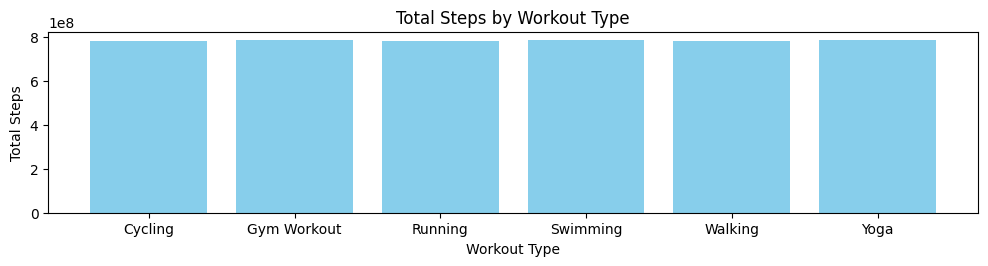

In [29]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.bar(workout_summary['workout_type'], workout_summary['steps'], color='skyblue')
plt.title('Total Steps by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Total Steps')

***Calories Burned vs Workout Type***

Text(0, 0.5, 'Total Calories Burned')

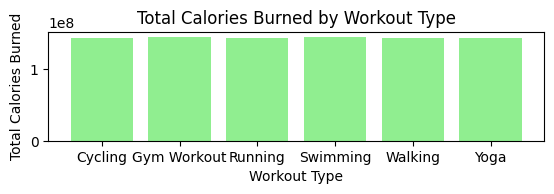

In [30]:
plt.subplot(3, 1, 2)
plt.bar(workout_summary['workout_type'], workout_summary['calories_burned'], color='lightgreen')
plt.title('Total Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Total Calories Burned')

Text(0, 0.5, 'Total Distance (km)')

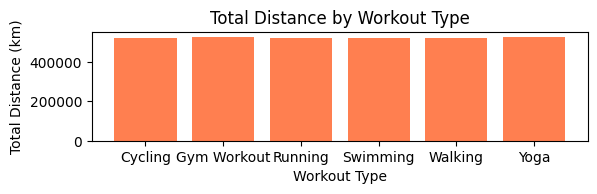

In [31]:
plt.subplot(3, 1, 3)
plt.bar(workout_summary['workout_type'], workout_summary['distance_km'], color='coral')
plt.title('Total Distance by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Total Distance (km)')

## Mood And Workout Type Correlation

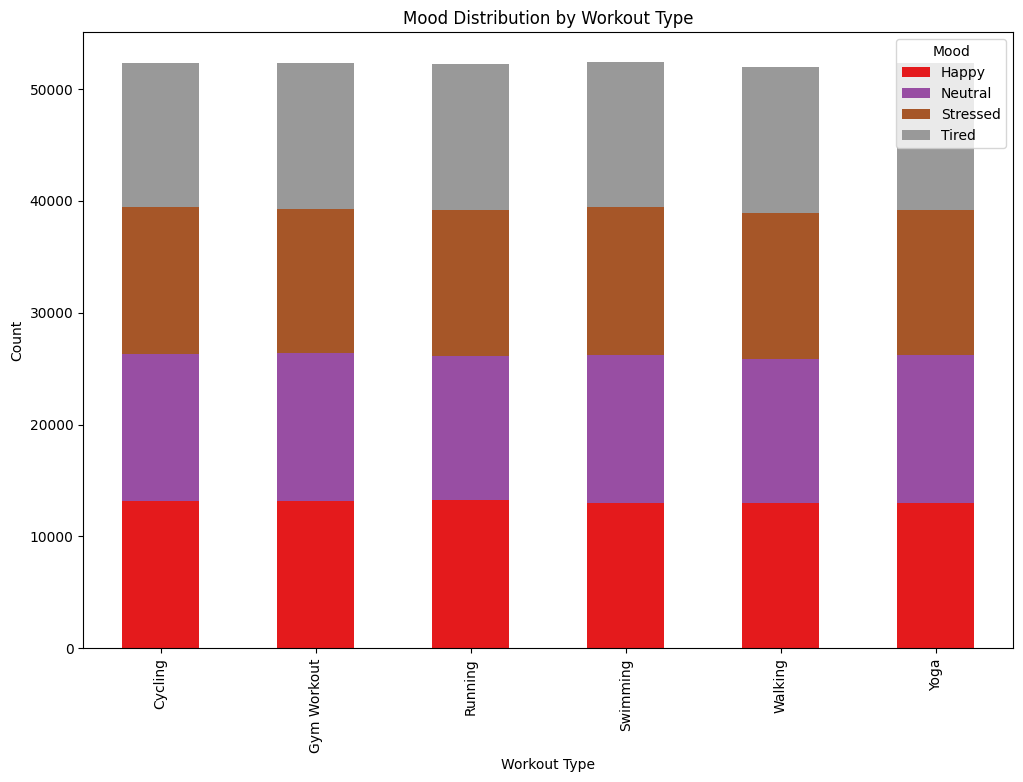

In [32]:
# Count occurrences of each mood for each workout type
mood_workout_counts = df.groupby(['workout_type', 'mood']).size().unstack()

# Plot
mood_workout_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set1')
plt.title('Mood Distribution by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.legend(title='Mood')
plt.show()


## Weather Condition and Workout Types

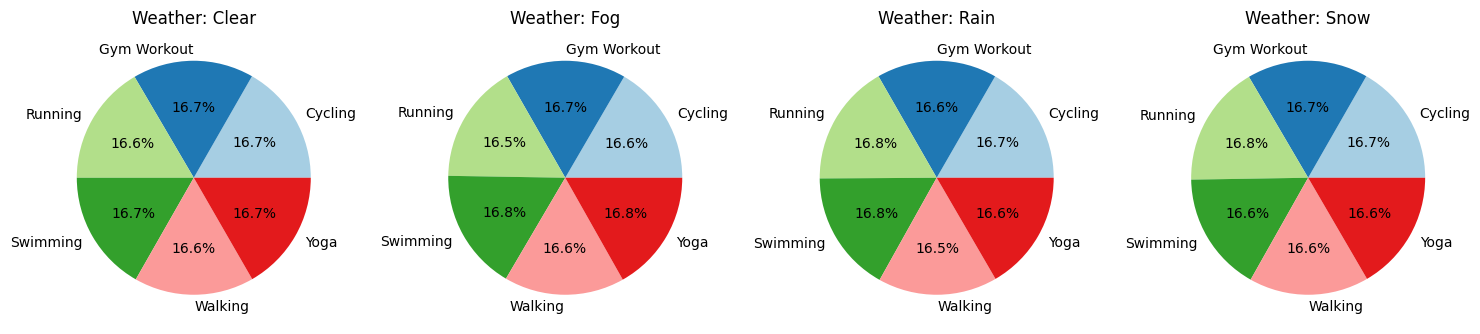

In [33]:
weather_workout_counts = df.groupby(['weather_conditions', 'workout_type']).size().unstack()

# Create subplots for each weather condition
weather_conditions = weather_workout_counts.index
num_conditions = len(weather_conditions)
fig, axes = plt.subplots(1, num_conditions, figsize=(15, 5), sharey=True)

# Plot pie charts
for ax, weather_condition in zip(axes, weather_conditions):
    sizes = weather_workout_counts.loc[weather_condition]
    ax.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(sizes.index))))
    ax.set_title(f'Weather: {weather_condition}')

plt.tight_layout()
plt.show()

## Workout Metrics vs Moods

<Figure size 1200x800 with 0 Axes>

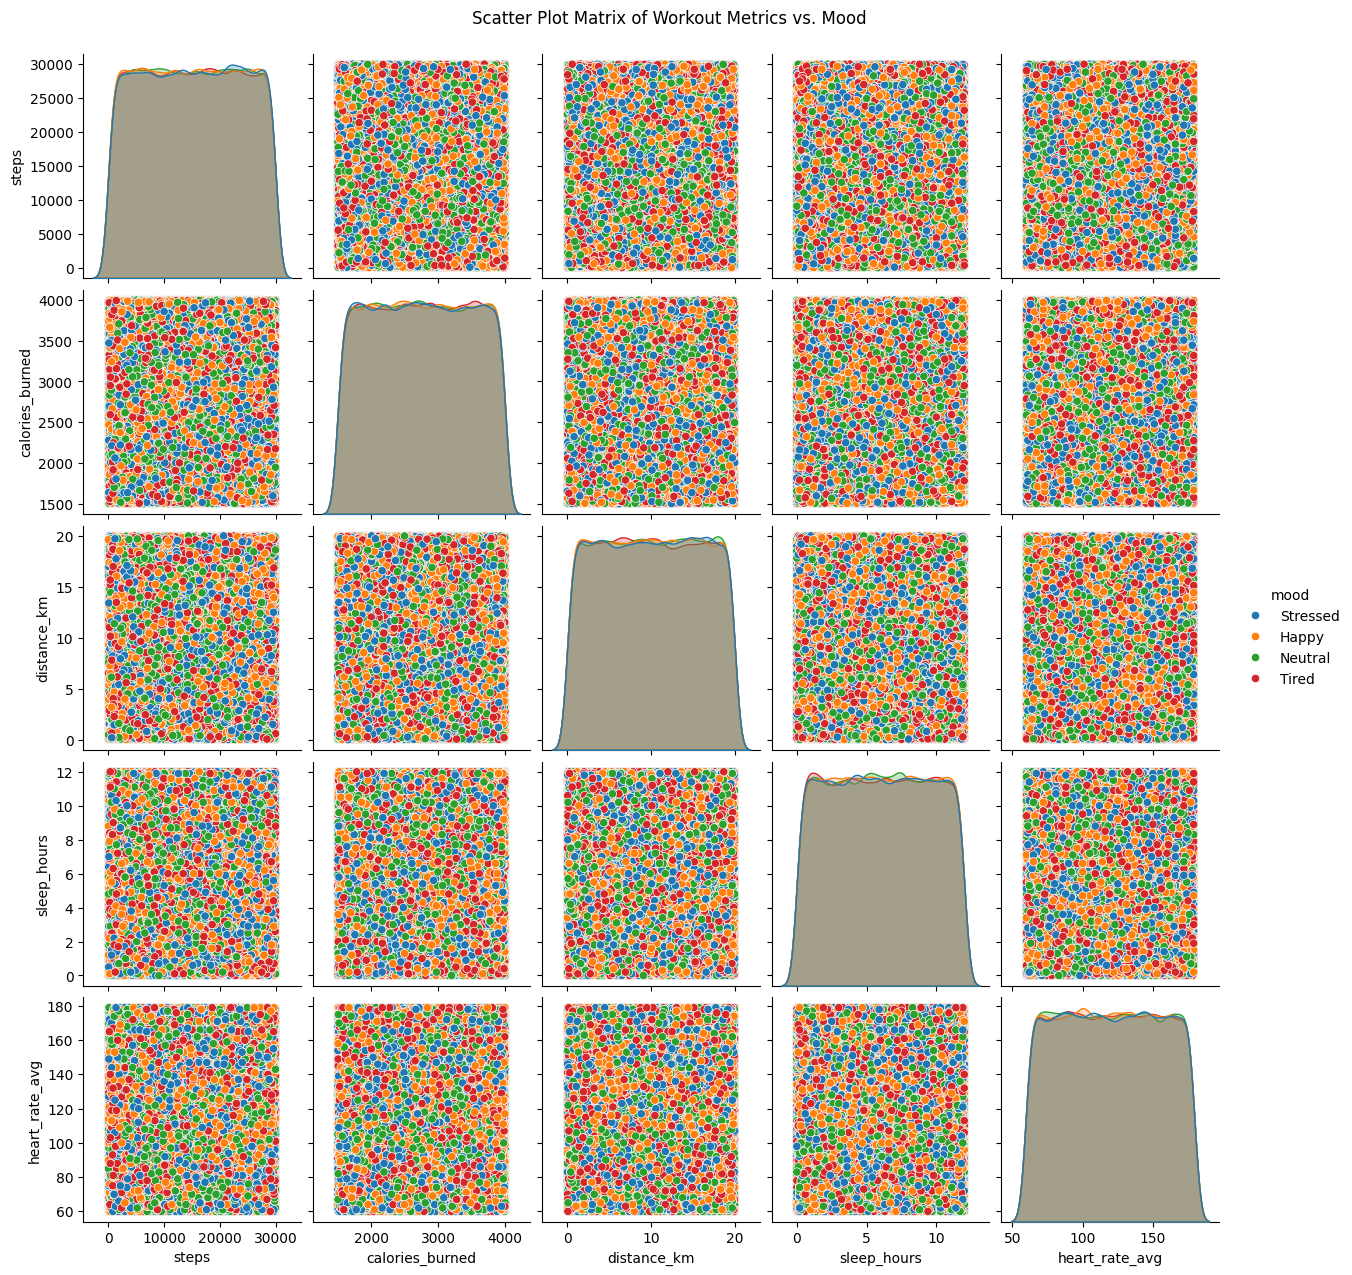

In [34]:
# Convert mood to categorical codes
df['mood_code'] = pd.Categorical(df['mood']).codes

# Plot
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='mood', vars=['steps', 'calories_burned', 'distance_km', 'sleep_hours', 'heart_rate_avg'])
plt.suptitle('Scatter Plot Matrix of Workout Metrics vs. Mood', y=1.02)
plt.show()


## Sleep Hour Distribution

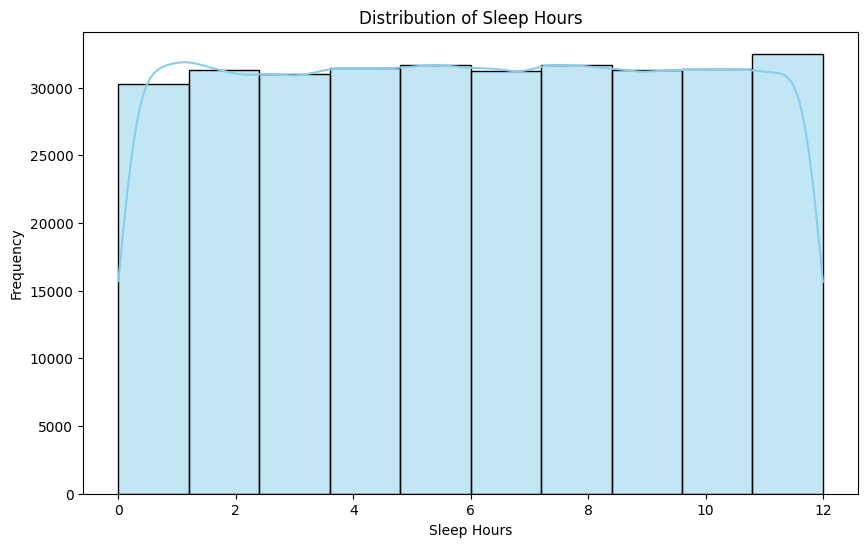

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sleep_hours'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

**Sleep Hour and Workout Metrics**

C:\Users\santa\AppData\Local\Temp\ipykernel_28080\1254426840.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\Project\Stress Detection and Emergency Response System\major-1\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


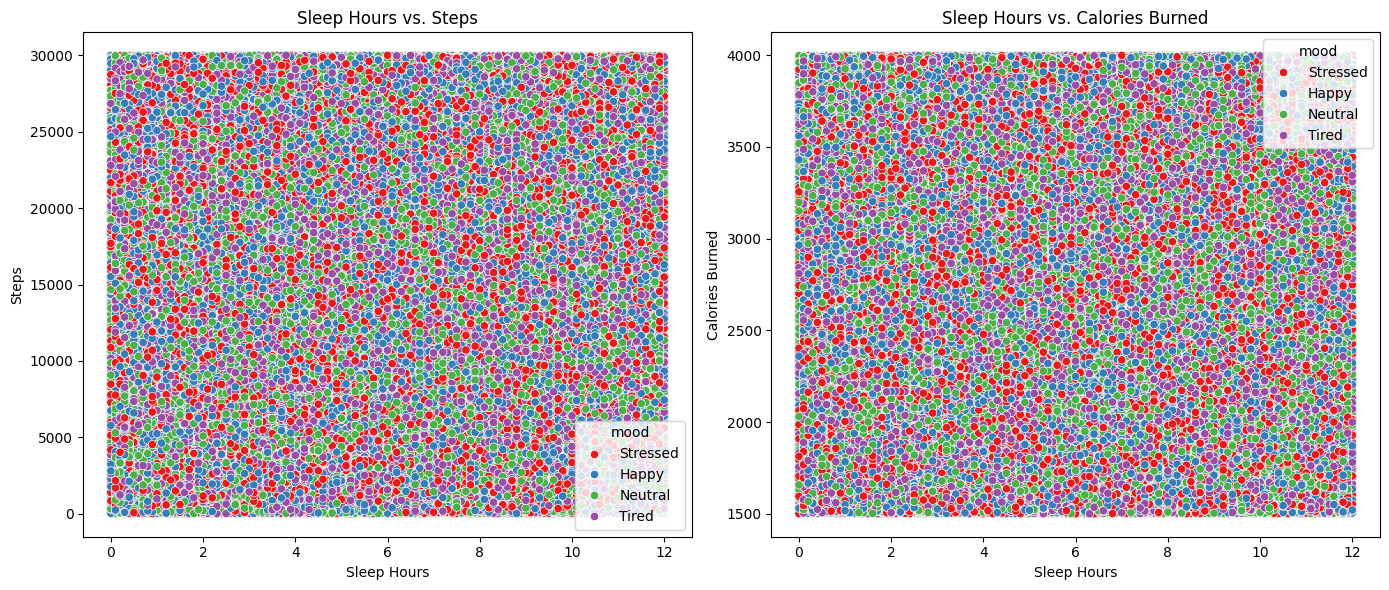

In [37]:
plt.figure(figsize=(14, 6))

# Scatter plot of Sleep Hours vs. Steps
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='sleep_hours', y='steps', hue='mood', palette='Set1')
plt.title('Sleep Hours vs. Steps')
plt.xlabel('Sleep Hours')
plt.ylabel('Steps')

# Scatter plot of Sleep Hours vs. Calories Burned
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='sleep_hours', y='calories_burned', hue='mood', palette='Set1')
plt.title('Sleep Hours vs. Calories Burned')
plt.xlabel('Sleep Hours')
plt.ylabel('Calories Burned')

plt.tight_layout()
plt.show()


**Sleep Hour And Mood**

C:\Users\santa\AppData\Local\Temp\ipykernel_28080\720433237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mood', y='sleep_hours', palette='Set3')


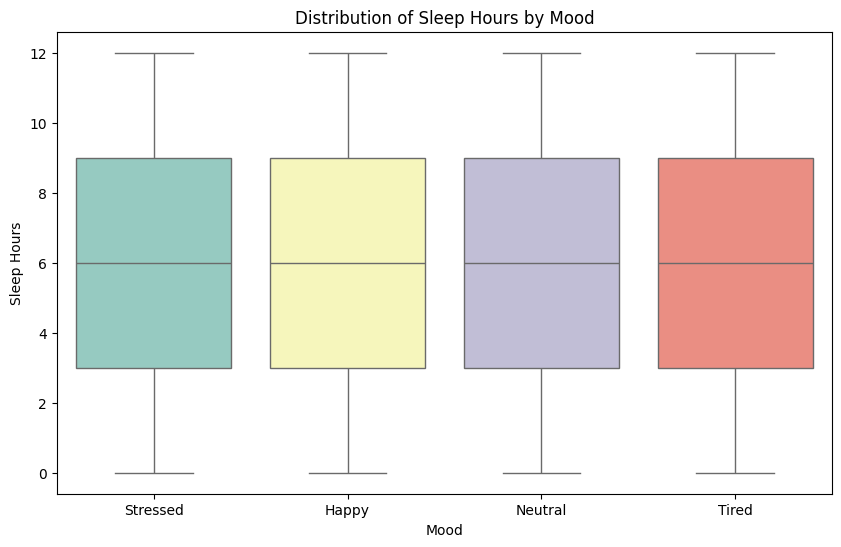

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='mood', y='sleep_hours', palette='Set3')
plt.title('Distribution of Sleep Hours by Mood')
plt.xlabel('Mood')
plt.ylabel('Sleep Hours')
plt.show()


**Sleep Hours Over Time**

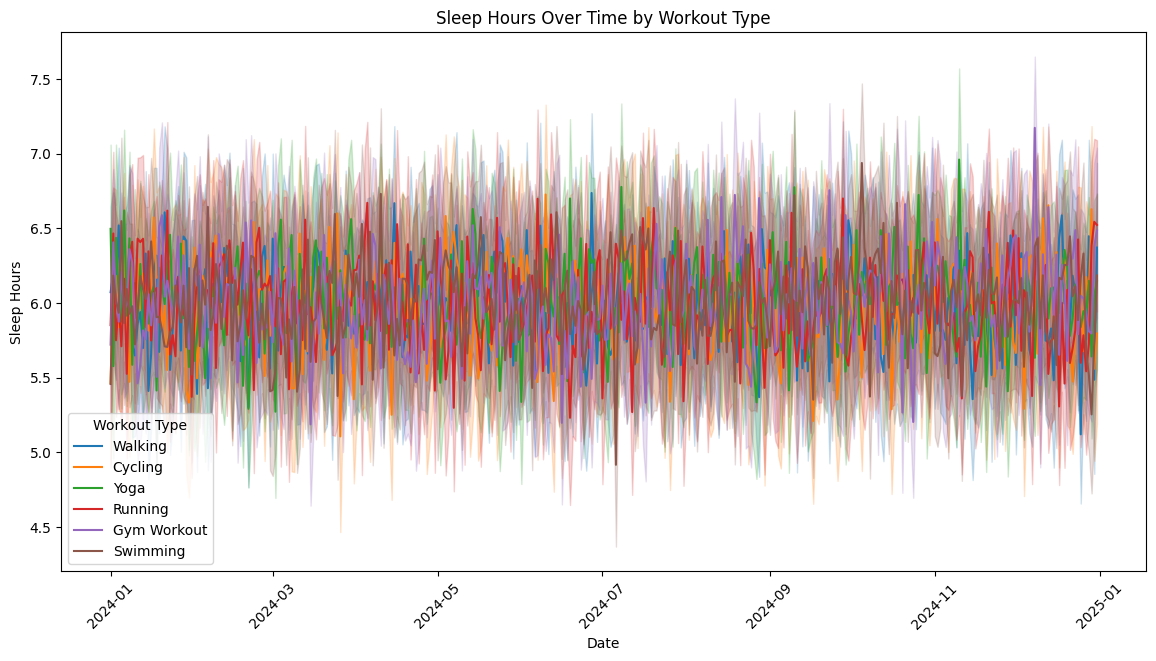

In [35]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='sleep_hours', hue='workout_type', palette='tab10')
plt.title('Sleep Hours Over Time by Workout Type')
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.xticks(rotation=45)
plt.legend(title='Workout Type')
plt.show()


# Storing Into CSV Format

In [43]:
dfs = {
    'walking': grouped_walking_df,
    'cycling': grouped_cycling_df,
    'yoga': grouped_yoga_df,
    'gym': grouped_gym_workout_df,
    'swimming': grouped_swimming_df,
    'running': grouped_running_df
}

directory = '../Data/Processed/2024/'

# Save each DataFrame to a CSV file
for name, df in dfs.items():
    file_path = os.path.join(directory, f'{name}.csv')
    df.to_csv(file_path, index=False)
    print(f"DataFrame '{name}' has been saved to {file_path}")

DataFrame 'walking' has been saved to ../Data/Processed/2024/walking.csv
DataFrame 'cycling' has been saved to ../Data/Processed/2024/cycling.csv
DataFrame 'yoga' has been saved to ../Data/Processed/2024/yoga.csv
DataFrame 'gym' has been saved to ../Data/Processed/2024/gym.csv
DataFrame 'swimming' has been saved to ../Data/Processed/2024/swimming.csv
DataFrame 'running' has been saved to ../Data/Processed/2024/running.csv
